# Unsupervised Learning
#### © Explore Data Science Academy

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Honour Code
We JS7, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Import Libraries and Read In the Data
Do not modify or remove any of the code in these cells.

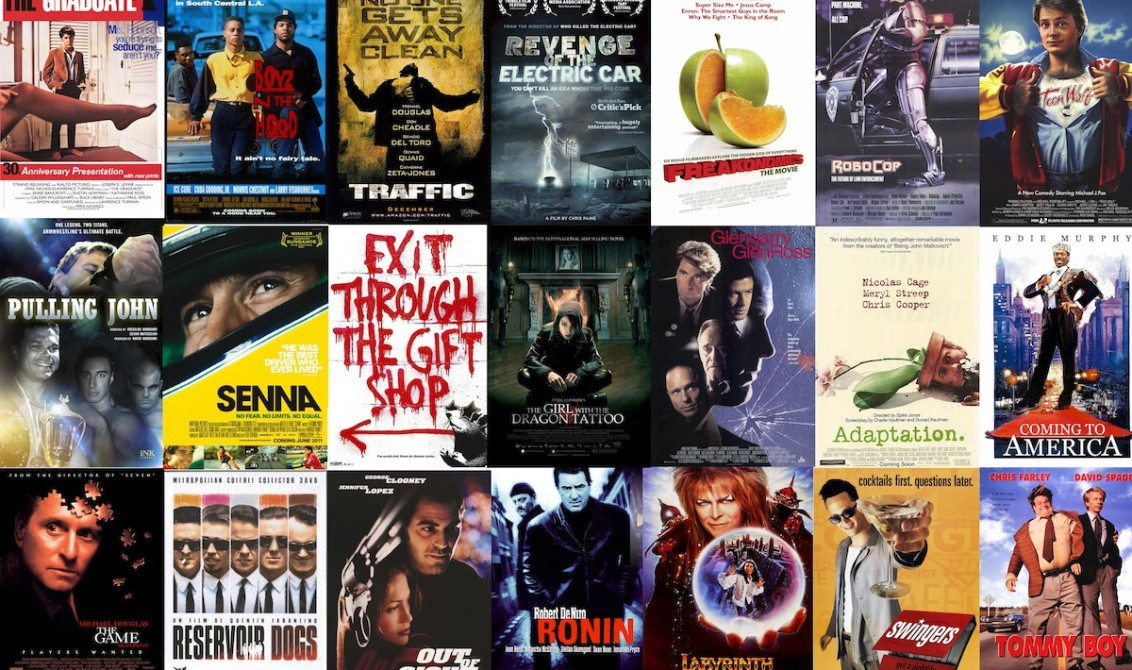

## Problem Statement

Everyone loves movies irrespective of age,gender,race,color,or geographical location. We all in a way are connected to each other via this amazing meduim.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>

## 1. Importing Packages

In [1]:
#data analysis import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visualizations libraries...
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Natural Language Processing libraries....
from collections import defaultdict
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
import string
import plotly.figure_factory as ff
import random
import re
from wordcloud import WordCloud
from collections import Counter
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np
from collections import Counter

# Machine learning models
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

# nltk for preprocessing of text data
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## 2. Loading Data

In [2]:
# import dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')
df_imdb = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## 3. Exploritory Data Analysis

In [3]:
df_train.head() # viewing the first n rows

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
df_train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [5]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Merging the dataset with that of the movies
df_train2 = pd.merge(df_train,df_movies,on='movieId')

# Viewing first 5 rows
df_train2.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [9]:
# Merging the dataset with that of the imbd
df_train3 = pd.merge(df_train2,df_imdb, on="movieId")

# Viewing first 5 rows
df_train3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [10]:
df_train3.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

In [11]:
df_train3.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

In [12]:
ratings=pd.DataFrame(df_train3.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000


In [13]:
ratings['number of ratings'] = pd.DataFrame(df_train3.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2


In [14]:
ratings.sort_values('number of ratings', ascending=False).head()

,rating,number of ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014


In [15]:
movie_ratings = pd.read_csv('train.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Average rating in dataset: 3.5333951730983424


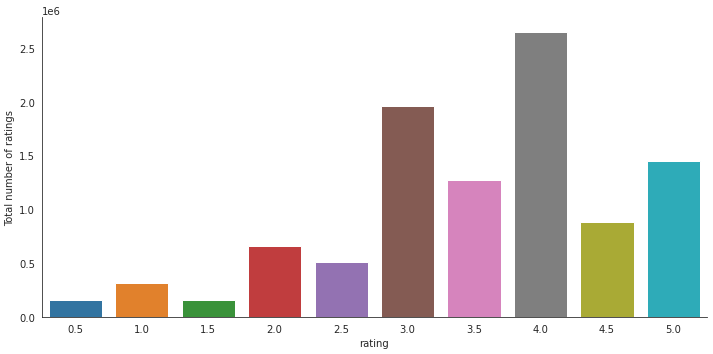

In [16]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=movie_ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(movie_ratings["rating"])}')

## 2. Data Engineering

In [21]:
# Label encoding of title column numerically
le = LabelEncoder()
le.fit(df_train3['title'])
print(list(le.classes_))
df_train3['title'] = le.transform(df_train3['title'])

LabelEncoder()

['"Great Performances" Cats (1998)', '$ (Dollars) (1971)', '$5 a Day (2008)', '$9.99 (2008)', '$ellebrity (Sellebrity) (2012)', "'71 (2014)", "'Hellboy': The Seeds of Creation (2004)", "'Human' Factor, The (Human Factor, The) (1975)", "'Neath the Arizona Skies (1934)", "'R Xmas (2001)", "'Round Midnight (1986)", "'Salem's Lot (2004)", "'Til There Was You (1997)", "'Twas the Night Before Christmas (1974)", "'burbs, The (1989)", "'night Mother (1986)", '(500) Days of Summer (2009)', '(A)sexual (2011)', '(Untitled) (2009)', '*batteries not included (1987)', '+1 (2013)', '...All the Marbles (1981)', '...And God Spoke (1993)', '...And Justice for All (1979)', '...tick... tick... tick... (1970)', '.45 (2006)', '009 Re: Cyborg (2012)', '1 (2013)', '1 (2014)', '1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)', '1-900 (06) (1994)', '10 (1979)', '10 000 timmar (2014)', '10 Items or Less (2006)', '10 Questions for the Dalai Lama (2006)', '10 Rillington Place (1971)', '10 Things I Hate About You (19

In [23]:
df_train3.tail(5)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,12419,Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,NaN,NaN
9633027,78784,96316,3.5,1345995049,781,Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,NaN,NaN,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,14459,Crime|Drama|Film-Noir,NaN,NaN,NaN,NaN,NaN
9633029,84146,107912,3.0,1389449965,6866,Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,6395,Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,NaN,genius|artist|greek american|direction


In [24]:
df_train3=df_train3.fillna(0)#converts NA to 0

In [25]:
df_train3.tail()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,12419,Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,0,0
9633027,78784,96316,3.5,1345995049,781,Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,0.0,0,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,14459,Crime|Drama|Film-Noir,0,0,0.0,0,0
9633029,84146,107912,3.0,1389449965,6866,Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,6395,Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,0,genius|artist|greek american|direction


## 3. Modeling

## 4. References